In [1]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications import resnet50
from sklearn.metrics import accuracy_score
import joblib

2022-09-04 10:58:22.208041: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-04 10:58:22.213796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

In [3]:

# Load the json file that contains the model's structure
f = Path("./model/model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("./model/model_weights.h5")

2022-09-04 10:58:30.699020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-cas/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

In [4]:
# Load data set
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/test.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A652157-01-22-1901-NA-CHEST_AP_PORT-58283-5.00...,positive
1,38ccf1a4-071c-4243-86b5-3f7d5db8df5c.png,negative


In [5]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [6]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [7]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [8]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85F4577370> 63
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F85DC308970> 86
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC308C40> 107
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC308BB0> 121
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC308B20> 127
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC308CD0> 134
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC308F70> 228
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F85DC308CD0> 234
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F85DC30E1C0> 240
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F85DC30E250> 258
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85DC30E1C0> 266
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F85

In [9]:
len(images)

900

In [10]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [11]:
# Create a single numpy array with all the images we loaded
x_test = np.array(images)

# Also convert the labels to a numpy array
y_true = np.array(labels)

In [12]:
print(x_test.shape, y_true.shape)

(900, 224, 224, 3) (900,)


In [13]:
# Normalize image data to 0-to-1 range
x_test /= 255
x_test.shape

(900, 224, 224, 3)

In [14]:
# Given the test images, make a final prediction using our own model
results = model.predict(x_test)

#Process results
p_pred = results.flatten()

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

29/29 [==============================] - 2s 54ms/step


In [15]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.9422222222222222


In [16]:
import matplotlib

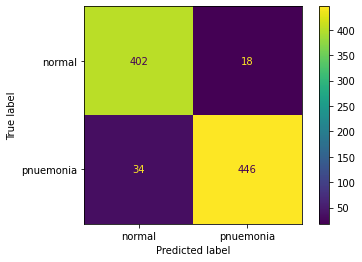

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['normal', 'pnuemonia']
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9220    0.9571    0.9393       420
           1     0.9612    0.9292    0.9449       480

    accuracy                         0.9422       900
   macro avg     0.9416    0.9432    0.9421       900
weighted avg     0.9429    0.9422    0.9423       900

